# Ordinary Least Squares in Statsmodels (OLS) - Lab

## Introduction

Previously, you looked at all the requirements for running an OLS simple linear regression using Statsmodels. You worked with the height-weight data set to understand the process and all of the necessary steps that must be performed. In this lab , you'll explore a slightly more complex example to study the impact of spending on different advertising channels on total sales.

## Objectives

You will be able to:
* Perform a linear regression using statsmodels
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters
* Determine if a particular set of data exhibits the assumptions of linear regression

## Let's get started

In this lab, you'll work with the "Advertising Dataset", which is a very popular dataset for studying simple regression. [The dataset is available on Kaggle](https://www.kaggle.com/purbar/advertising-data), but we have downloaded it for you. It is available in this repository as `advertising.csv`. You'll use this dataset to answer this question:

> Which advertising channel has the strongest relationship with sales volume, and can be used to model and predict the sales?

## Step 1: Read the dataset and inspect its columns and 5-point statistics

In [1]:
# Load necessary libraries and import the data
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
df = pd.read_csv('advertising.csv')


Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


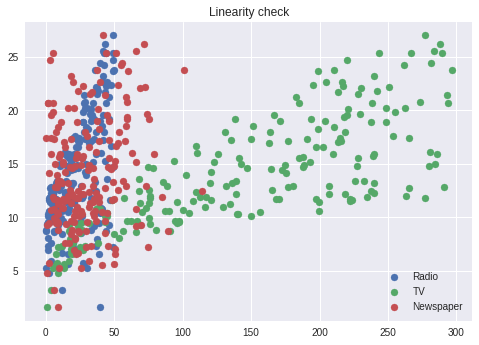

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
# Check the columns and first few rows
display(df.columns)
display(df.head())
plt.scatter(df.radio, df.sales, label='Radio')
plt.scatter(df.TV, df.sales, label='TV')
plt.scatter(df.newspaper, df.sales, label='Newspaper')
plt.title("Linearity check")
plt.legend()
plt.show()
try:
    df=df.drop('Unnamed: 0', axis=1)
    display(df.head())
except:
    print('error')

In [3]:
# Get the 5-point statistics for data 
from numpy import percentile
# calculate quartiles
quartiles = percentile(df.sales, [25, 50, 75])
# calculate min/max
data_min, data_max = df.sales.min(), df.sales.max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 1.600
Q1: 10.375
Median: 12.900
Q3: 17.400
Max: 27.000


In [4]:
# Describe the contents of this dataset

#this dataset contains columns for index, tv, radio, newspaper, and sales.
#each row appears to be a combination of amount of each type of advertising used, with resulting sales.

## Step 2: Plot histograms with kde overlay to check the distribution of the predictors

/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

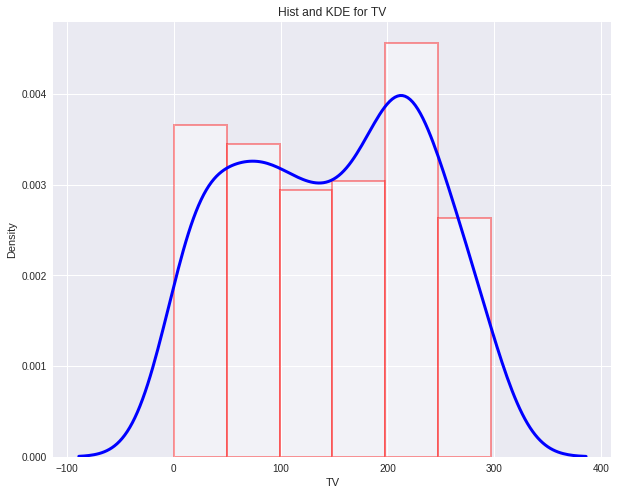

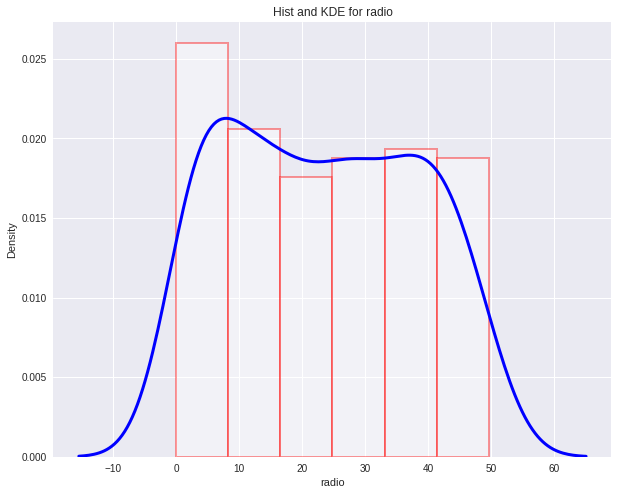

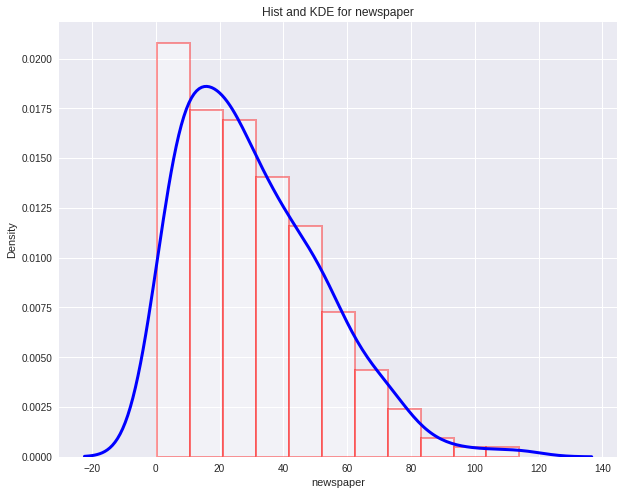

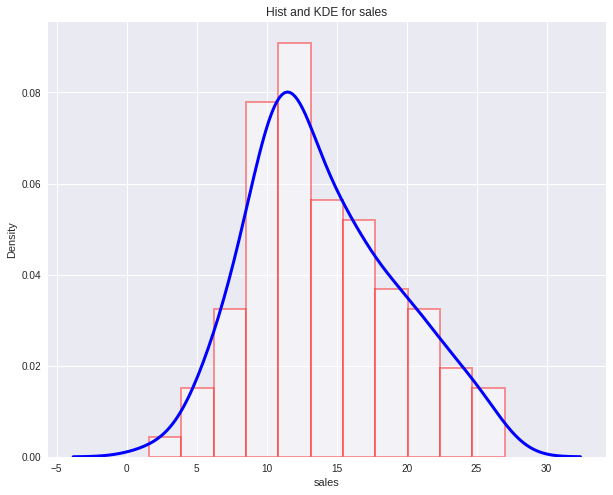

In [5]:
# For all the variables, check distribution by creating a histogram with kde
for col in df.columns:
    #print(col)
    fig, ax = plt.subplots(figsize = (10,8))

    sns.distplot(df[col], 
                 hist=True, hist_kws={
                                      "linewidth": 2,
                                      "edgecolor" :'red',
                                      "alpha": 0.4, 
                                      "color":  "w",
                                      "label": "Histogram",
                                      },
                 kde=True, kde_kws = {'linewidth': 3,
                                      'color': "blue",
                                      "alpha": 0.7,
                                      'label':'Kernel Density Estimation Plot'
                                     },
#                  fit= stats.norm, fit_kws = {'color' : 'green',
#                                              'label' : 'parametric fit',
#                                              "alpha": 0.7,
#                                               'linewidth':3},
                 ax=ax)
    ax.set_title('Hist and KDE for {}'.format(col))

In [6]:
# Record your observations here 

#TV and Radio seem to have a bi-modal (or at least non-normal) distribution
#Sales and Newspaper have a more normal distribution but with some skew


## Step 3: Test for the linearity assumption 

Use scatterplots to plot each predictor against the target variable

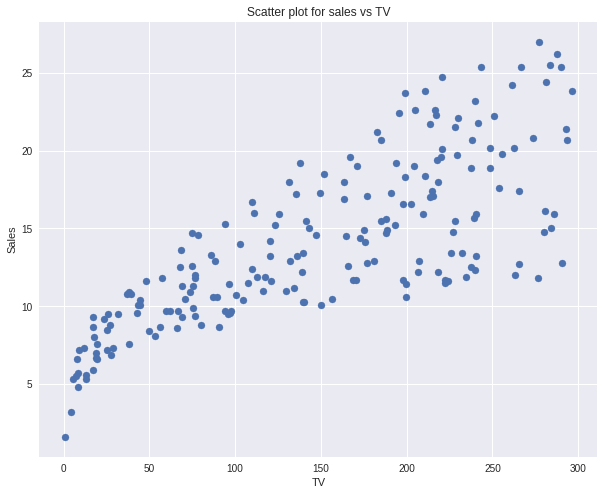

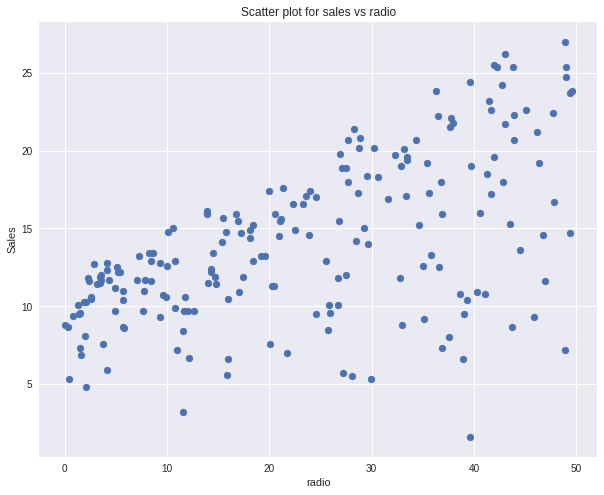

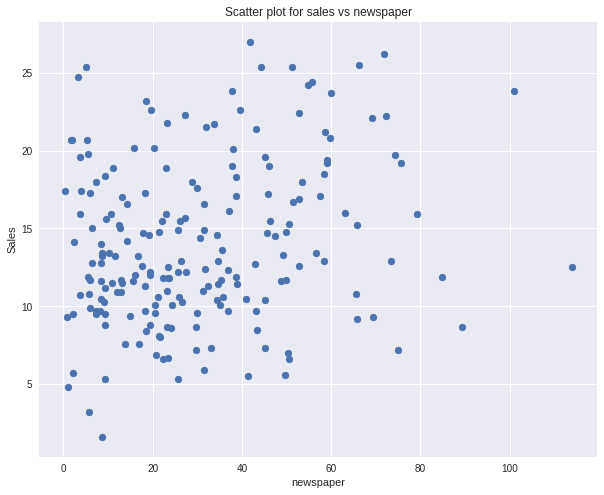

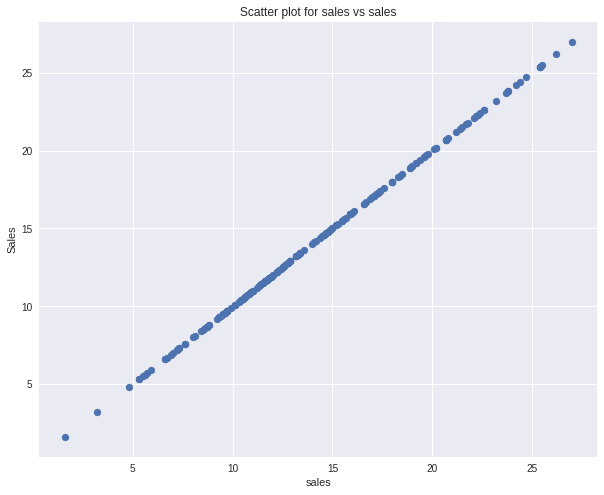

In [7]:
# visualize the relationship between the prediCtors and the target using scatterplots
for col in df.columns:
    fig, ax = plt.subplots(figsize = (10,8))
    plt.scatter(df[col], df.sales)
    ax.set_title('Scatter plot for sales vs {}'.format(col))
    plt.xlabel(col)
    plt.ylabel('Sales')

In [8]:
# Record yor observations on linearity here 

#TV and radio definitely appear heteroscedastic to sales, but do have a linear relationship
#Newspaper looks randomly distributed and potentially homoscedastic to sales

### Conclusion so far

Based on above initial checks, we can confidently say that TV and radio appear to be good predictors for our regression analysis. Newspaper is very heavily skewed and also doesnt show any clear linear relationship with the target. 
> We'll move ahead with our analysis using TV and radio, and rule out newspaper because we believe it violates OLS assumptions

Note: Kurtosis can be dealt with using techniques like log normalization to "push" the peak towards the center of distribution. You'll learn about this later on.

## Step 4: Run a simple regression in Statsmodels with TV as a predictor

In [9]:
# import libraries
#done above

# build the formula 
f = 'sales~TV'
# create a fitted model in one line
model = ols(formula=f, data=df).fit()

## Step 5: Get Regression Diagnostics Summary

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           1.47e-42
Time:                        21:45:20   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note here that the coefficients represent associations, not causations

## Step 6:  Draw a prediction line with data points on a scatter plot for X (TV) and Y (Sales)

Hint: You can use the `model.predict()` function to predict the start and end point of of regression line for the minimum and maximum values in the 'TV' variable. 

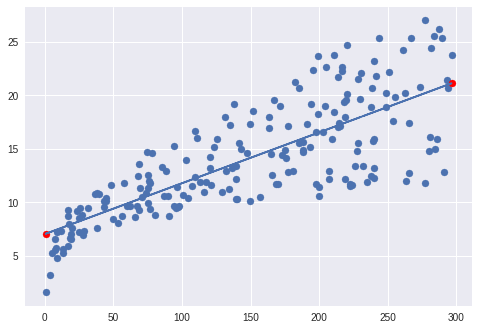

In [11]:
plt.plot(df.TV,model.predict())
plt.scatter(df.TV,df.sales)
# create a DataFrame with the minimum and maximum values of TV
df_tv_minmax = pd.DataFrame({'TV':[df.TV.max(), df.TV.min()], 
                             'TVy':[0, 0]}, columns = ['TV', 'TVy'])
#display(df_tv_minmax)

# make predictions for those x values and store them
#display('stuff',model.predict([df.TV.max(),df.TV.min()],transform=False))
#display('stuff2',model.predict(df_tv_minmax.TV))

df_tv_minmax['TVy']=model.predict(df_tv_minmax.TV)

plt.scatter(df_tv_minmax.TV, df_tv_minmax.TVy, color='red')



# first, plot the observed data and the least squares line

## Step 7: Visualize the error term for variance and heteroscedasticity

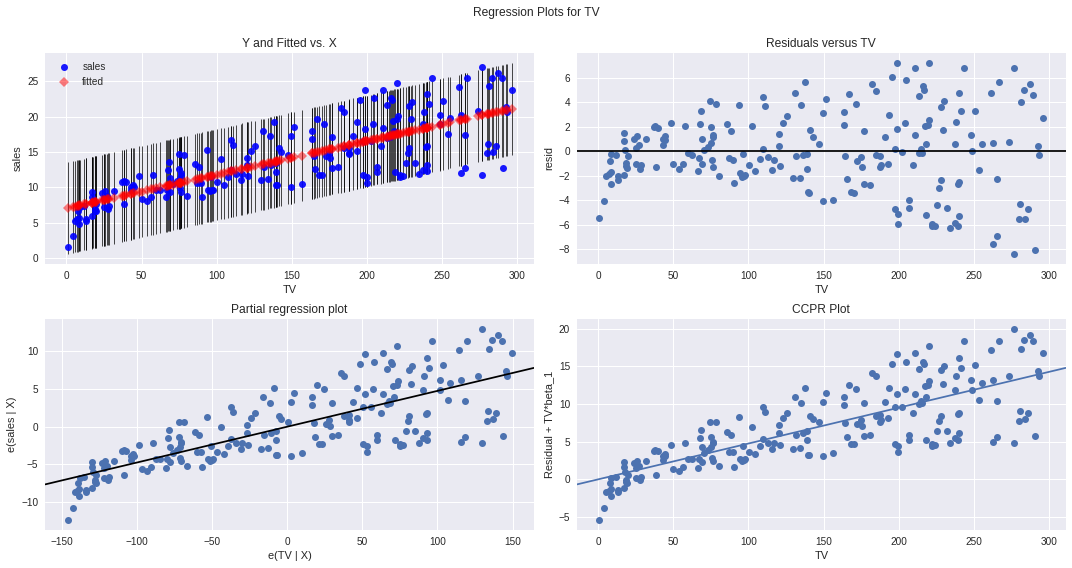

In [12]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "TV", fig=fig)
plt.show()


In [13]:
# Record Your observations on heteroscedasticity
#Observing the Residuals vs TV graph, the residuals seem to spread out a little going to higher values of TV, so there may be 
#some heteroscedasticity

## Step 8: Check the normality assumptions by creating a QQ-plot

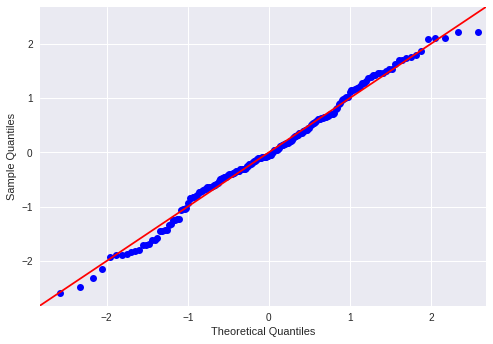

In [14]:
# Code for QQ-plot here
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [15]:
# Record Your observations on the normality assumption
#there is some slight deviation at the start, but overall this hangs closely enough to the 45 degree line to 
#indicate normality is a safe assumption.

## Step 9: Repeat the above for radio and record your observations

In [16]:
# code for model, prediction line plot, heteroscedasticity check and QQ normality check here
f = 'sales~radio'
# create a fitted model in one line
model = ols(formula=f, data=df).fit()

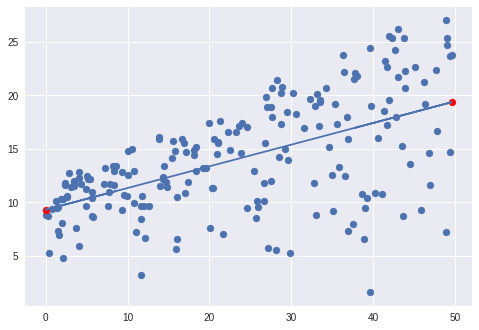

In [17]:
plt.plot(df.radio,model.predict())
plt.scatter(df.radio,df.sales)
# create a DataFrame with the minimum and maximum values of radio
df_r_minmax = pd.DataFrame({'radio':[df.radio.max(), df.radio.min()], 
                             'radioy':[0, 0]}, columns = ['radio', 'radioy'])

df_r_minmax['radioy']=model.predict(df_r_minmax.radio)

plt.scatter(df_r_minmax.radio, df_r_minmax.radioy, color='red')

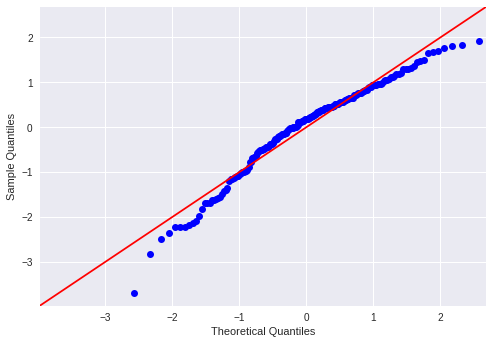

In [18]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

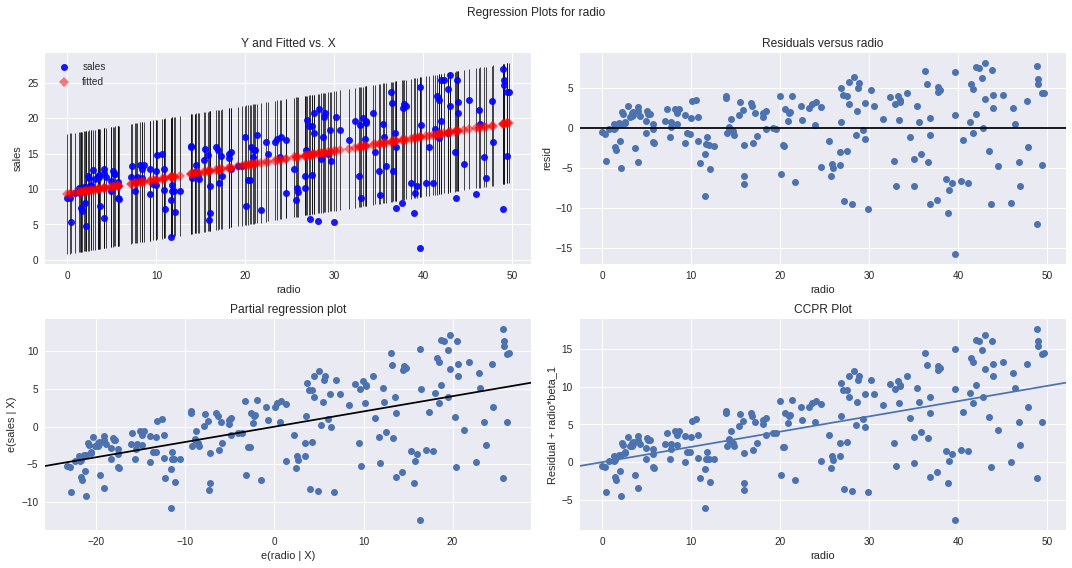

In [19]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "radio", fig=fig)
plt.show()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           4.35e-19
Time:                        21:45:21   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Record your observations here for goodnes of fit 
#seems overall to have a good fit.  However, the residual plot indicates some heteroscedasticity, and
# the qq plot does indicate some cause for concern .  Furthermore, the R^2 value is not that high (.6 for TV, .3 for Radio)
#Still, we have confidence within usual values of alpha that there is a relationship - though it appears tenuous enough to not make a conclusion on these relationships.

## The Answer

Based on the above analysis, you can conclude that none of the two chosen predictors is ideal for modeling a relationship with the sales volumes. `Newspaper` clearly violated the linearity assumption. `TV` and `radio` did not provide a high value for the coefficient of determination, where TV performed slightly better than the radio. There is obvious heteroscdasticity in the residuals for both variables. 

> We can either look for further data, perform extra preprocessing or use more advanced techniques. 

Remember there are lots of techniques we can employ to fix these data. 

Whether we should call TV the "best predictor" or label all of them "equally useless", is a domain specific question and a marketing manager would have a better opinion on how to move forward with this situation. 

In the following lesson, you'll look at the more details on interpreting the regression diagnostics and confidence in the model. 

## Summary

In this lab, you ran a complete regression analysis with a simple dataset. You used statsmodel to perform linear regression and evaluated your models using statistical metrics. You also looked for the regression assumptions before and after the analysis phase. Finally, you created some visualizations of your models and checked their goodness of fit. 